In [1]:
# подгружаем модуль re для работы с текстом
import re

In [2]:
# открывает train_data
with open('train_data.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    # убираем первый невидимый символ
    text = text.replace('\ufeff', '')
    # убираем все недопустимые символы
    text = re.sub(r'[^А-я ]', '', text) 

In [3]:
text

'Вы  лучший ответ на проблемы которые возникли в понедельникДумайте позитивно и верьте в свою способность достигать отличных результатовЕсли вы смогли в понедельник подняться с постели значит вы супер герой'

In [4]:
# зададим кол-во символов: 33 буквы + пробел
num_characters = 34

In [5]:
print(f'Длина текста составляет {len(text)} символов')

Длина текста составляет 205 символов


Задача. Подать на вход нейронной сети n-символов и предсказать следующий символ.

для решения нам подойдет архитектура "many_to_one"

In [6]:
import keras
from keras.preprocessing.text import Tokenizer

In [7]:
# Экземпляр класс Tokenizer содержит:
# num_words - максимальное колво символов, которое вернкт Tokenizer
# filters - исключаемые символы (по умолчанию ВСЕ знаки препинания)
# lower - перевод в нижний регистр (True), не надо переводить (False)
# split - разделение слов по символу (split=' ' - по пробелу)
# char_level - деление текста на слова (False), на символы (True)
tokenizer = Tokenizer(num_words=num_characters, char_level=True)

In [8]:
# обучение токенайзера на нашем тексте
tokenizer.fit_on_texts(text)

In [9]:
# в рез-те получаем словарь
print(tokenizer.word_index)

# в словаре всего 27 значений из 34, это значит, что остальных символов просто нет в нашем тексте

{' ': 1, 'о': 2, 'т': 3, 'е': 4, 'и': 5, 'в': 6, 'н': 7, 'с': 8, 'л': 9, 'п': 10, 'ь': 11, 'ы': 12, 'р': 13, 'а': 14, 'д': 15, 'у': 16, 'к': 17, 'з': 18, 'ч': 19, 'й': 20, 'м': 21, 'г': 22, 'б': 23, 'я': 24, 'ш': 25, 'ю': 26, 'х': 27}


In [10]:
# опредлеим длину последовательности для предсказания
inp_chars = 5   # тогда предсказывать будем 4 символ
# категоризируем токены, аналогично to_categorical
data = tokenizer.texts_to_matrix(text)

In [11]:
data[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
# размер обучающего множества
n = data.shape[0] - inp_chars
n  

200

In [13]:
import numpy as np

In [14]:
# предсказание следующего символа
X = np.array([data[i:i+inp_chars, :] for i in range(n)])
Y = data[inp_chars:] 

In [15]:
len(X)

200

In [16]:
X[0]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [17]:
Y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
from keras.layers import *
from keras.models import Sequential

In [19]:
model = Sequential([
    Input((inp_chars, num_characters)),
    SimpleRNN(500, activation='tanh'),
    Dense(num_characters, activation='softmax') # softmax - на выходе только 1 число
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 500)               267500    
                                                                 
 dense (Dense)               (None, 34)                17034     
                                                                 
Total params: 284,534
Trainable params: 284,534
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

history = model.fit(X, Y, batch_size=32, epochs=100, verbose=0)


In [21]:
print(f'Среднее значение точности: {np.mean(history.history["accuracy"])*100:.2f} %')
print(f'Максимальное значение точности: {np.max(history.history["accuracy"])*100:.2f} %')

Среднее значение точности: 91.73 %
Максимальное значение точности: 99.00 %


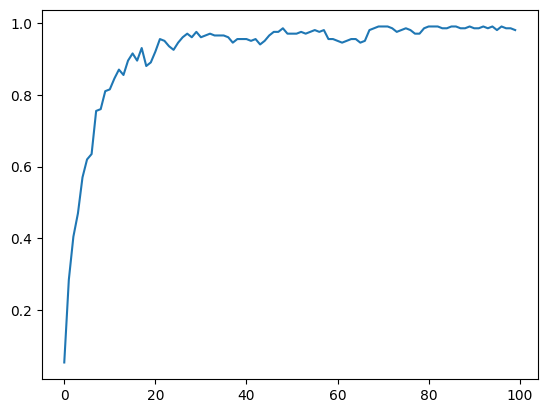

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])

In [23]:
# напишем функцию для прогноза следующего символа
def buildPhrase(inp_str, str_len = 50):
  """
  params:
  inp_str - строка входа
  str_len - 
  """
  for i in range(str_len):
    # задаем пустой вектор
    x = []
    for j in range(i, i+inp_chars):
      # преобразуем символы в One-Hot-encoding
      x.append(tokenizer.texts_to_matrix(inp_str[j]))

    x = np.array(x)

    inp = x.reshape(1, inp_chars, num_characters)
    
    # предсказываем OHE четвертого символа
    pred = model.predict(inp) 
    # получаем ответ в символьном представлении
    d = tokenizer.index_word[pred.argmax(axis=1)[0]]

    inp_str += d # дописываем строку

  return inp_str

In [24]:
res = buildPhrase("возни")
print(res)

1/1 [==============================] - 0s 24ms/step
возникли в понедельникдумайте позитивно и верьте в свою
